In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data

In [ ]:
# !ls "/content/drive/MyDrive/machine learning/"
# !unzip "/content/drive/MyDrive/machine learning/phan_biet_cho_meo/FullData_Cats-Dogs.zip" -d "/content/drive/MyDrive/machine learning/phan_biet_cho_meo/"

# Import

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory

# Generate

In [ ]:
PATH = '/content/drive/MyDrive/machine learning/phan_biet_cho_meo/cats_and_dog_large/'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 128
IMG_SIZE = (160, 160)
BUFFER_SIZE = BATCH_SIZE*5

train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

train_dataset = train_dataset.prefetch(buffer_size=BUFFER_SIZE)
validation_dataset = validation_dataset.prefetch(buffer_size=BUFFER_SIZE)

Found 22000 files belonging to 2 classes.
Found 3000 files belonging to 2 classes.


# Code

In [ ]:
# Create the base model 
base_model = tf.keras.applications.VGG16(input_shape=(160,160,3),
                                               include_top=False,
                                               weights="imagenet")

# process data
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)
])

# flattening
flatten = tf.keras.layers.Flatten()

# final layer
prediction_layer = tf.keras.layers.Dense(1)

# construct a new network
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = base_model(x)
x = flatten(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

len(model.trainable_variables)

base_learning_rate = 0.0001
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(lr=base_learning_rate/10),
              metrics=['accuracy'])

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=PATH + "bestModel.h5",
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history_fine = model.fit(train_dataset,
                         epochs=50,
                         validation_data=validation_dataset,
                         callbacks=[model_checkpoint_callback])



Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


172/172 [==============================] - 174s 994ms/step - loss: 0.2765 - accuracy: 0.8644 - val_loss: 0.1066 - val_accuracy: 0.9580
Epoch 2/50
172/172 [==============================] - 172s 976ms/step - loss: 0.1398 - accuracy: 0.9404 - val_loss: 0.0871 - val_accuracy: 0.9713
Epoch 3/50
172/172 [==============================] - 172s 976ms/step - loss: 0.1094 - accuracy: 0.9541 - val_loss: 0.0774 - val_accuracy: 0.9763
Epoch 4/50
172/172 [==============================] - 177s 1s/step - loss: 0.0916 - accuracy: 0.9604 - val_loss: 0.0819 - val_accuracy: 0.9777
Epoch 5/50
172/172 [==============================] - 172s 972ms/step - loss: 0.0802 - accuracy: 0.9672 - val_loss: 0.0572 - val_accuracy: 0.9800
Epoch 6/50
172/172 [==============================] - 175s 996ms/step - loss: 0.0722 - accuracy: 0.9693 - val_loss: 0.0566 - val_accuracy: 0.9817
Epoch 7/50
172/172 [==============================] - 671s 4s/step - loss: 0.0643 - accuracy: 0.9748 - val_loss: 0.0704 - val_accuracy: 0.

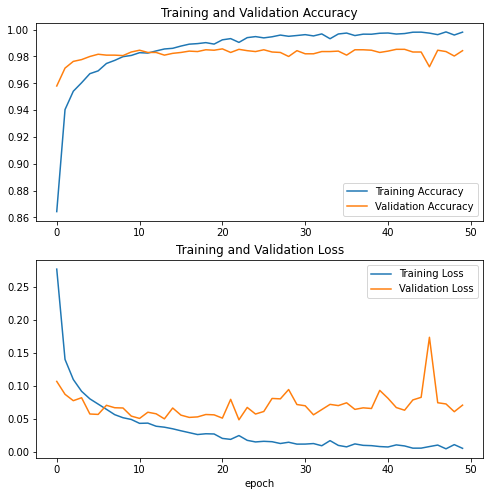

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history_fine.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(history_fine.history['loss'], label='Training Loss')
plt.plot(history_fine.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Load model

In [ ]:
# from tensorflow.keras.models import load_model
# savedModel=load_model('bestModel.h5')

/bin/bash: lshw: command not found
